In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




./AB_NYC_2019.csv
./homework6.ipynb
./.ipynb_checkpoints/homework6-checkpoint.ipynb


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)
# df.isna().sum()

<AxesSubplot:ylabel='Count'>

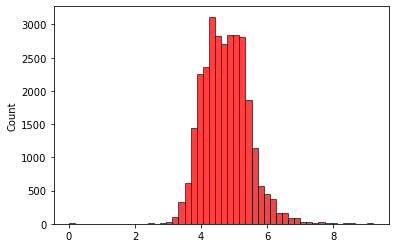

In [3]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df[columns], test_size=0.2, random_state=1)
df_train,  df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train["price"]
del df_val["price"]
del df_test["price"]

sns.histplot(y_train, bins=50, color='red')

In [4]:
# Q1
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

# dv.get_feature_names()

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)


# val_dict = df_val.to_dict(orient='records')
# X_val = dv.transform(val_dict)
# y_pred = dt.predict(X_val)
# roc_auc_score(y_val, y_pred)


#print decision tree
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names()))



|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



In [5]:
# Q2
# Random Forest of decision trees
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = rf.predict(X_val)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_val, y_pred , squared=False)
rmse

0.4598535778342608

,n_estimators,rmse
0,10,0.459854
1,20,0.447831
2,30,0.445120
3,40,0.443225
4,50,0.442231
5,60,0.441535
6,70,0.440867
7,80,0.440763
8,90,0.440244
9,100,0.439783


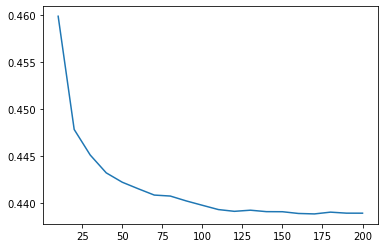

In [9]:
# Q3
from IPython.display import display
import matplotlib.pyplot as plt

scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred , squared=False)
    scores.append((n,rmse))

df_scores = pd.DataFrame(scores, columns=['n_estimators','rmse'])    
display(df_scores)

plt.plot(df_scores.n_estimators, df_scores.rmse)


In [ ]:
# Q3
from IPython.display import display
import matplotlib.pyplot as plt


for d in [10, 15, 20, 25]:
    scores = []
    for n in range(10, 201, 50):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred , squared=False)
        scores.append((d, n,rmse))

df_scores = pd.DataFrame(scores, columns=["max_depth",'n_estimators','rmse'])    
display(d, df_scores)


# plt.plot(df_scores.n_estimators, df_scores.rmse, label="d=%s"%d)

# plt.legend()    
